In [1]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas_profiling
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
import locale
import geopandas
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)


df_final_pob=pd.read_parquet('../data/main_processed/df_final_pob.parquet')

df_indicadores_pob=pd.read_parquet('../data/main_processed/df_indicadores_pob.parquet')

df_indicadores_pob_pivot=pd.read_parquet('../data/main_processed/df_indicadores_pob_pivot.parquet')

df_final_pob_melt=pd.read_parquet('../data/main_processed/df_final_pob_melt.parquet')

df_final_pob_melt_PC=pd.read_parquet('../data/main_processed/df_final_pob_melt_PC.parquet')

CCAA_CO = pd.read_parquet('../data/main_processed/CCAA_CO.parquet')
MUNI_CO = pd.read_parquet('../data/main_processed/MUNI_CO.parquet')
PROV_CO = pd.read_parquet('../data/main_processed/PROV_CO.parquet')

df_final_pob_dropdown=pd.read_parquet('../data/main_processed/df_final_pob_dropdown.parquet')

df_final_pob_dropdown_c=pd.read_parquet('../data/main_processed/df_final_pob_dropdown_c.parquet')

df_final_pob_poblaciontext=pd.read_parquet('../data/main_processed/df_final_pob_poblaciontext.parquet')

In [2]:
CCAA_types='Andalucía'
municipio_types= 'Sevilla'
cohorte='1.000-2.000'
partida_de_coste_types='Abastecimiento de agua potable'

In [20]:
df_final_pob.columns

Index(['CCAA', 'Provincia', 'Tipo Ente Principal', 'Nombre Ente Principal',
       'Código Ente Principal', 'Abastecimiento de agua potable',
       'Abastos, mercados, lonjas ', 'Acceso a los núcleos de población',
       'Actividades funerarias', 'Alcantarillado', 'Alumbrado público',
       'Biblioteca pública', 'Cementerio', 'Comercio ambulante',
       'Conservación y rehabilitación de la edificación',
       'Conservación, mantenimiento y vigilancia de los edificios destinados a educación',
       'Cooperar con las Administraciones educativas en la obtención de solares',
       'Equipamientos culturales',
       'Evacuación y tratamiento de aguas residuales', 'Ferias ',
       'Información y promoción de la actividad turística de interés y ámbito local',
       'Infraestructura viaria y otros equipamientos de titularidad de la entidad local',
       'Instalaciones de ocupación del tiempo libre',
       'Instalaciones deportivas', 'Instalaciones deportivas de uso público',
       

In [46]:
top=df_final_pob[['CCAA', 'Provincia', 'Tipo Ente Principal', 'Nombre Ente Principal',
       'Código Ente Principal', 'Población 2018', 'TOTAL',
       'PC_TOTAL', 'cohorte_pob', 'codigo_geo','PC_Transporte colectivo urbano de viajeros']].sort_values(by='PC_Transporte colectivo urbano de viajeros',ascending=False)

top.loc[top['Población 2018']<50000].head(10)

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Población 2018,TOTAL,PC_TOTAL,cohorte_pob,codigo_geo,PC_Transporte colectivo urbano de viajeros
4713,Comunitat Valenciana,Valencia / València,Ayuntamiento,Cortes de Pallás,17-46-099-AA-000,818.0,2298901.04,2810.392469,0-1.000,46099,182.532066
1080,Aragón,Zaragoza,Ayuntamiento,Terrer,02-50-253-AA-000,485.0,151877.37,313.149216,0-1.000,50253,148.143505
739,Aragón,Huesca,Ayuntamiento,Montanuy,02-22-157-AA-000,215.0,948738.30,4412.736279,0-1.000,22157,84.242372
4047,Galicia,Ourense,Ayuntamiento,Chandrexa de Queixa,11-32-029-AA-000,466.0,410719.13,881.371524,0-1.000,32029,69.012876
4373,La Rioja,"Rioja, La",Ayuntamiento,Villamediana de Iregua,16-26-168-AA-000,7973.0,2807779.30,352.160956,5.000-10.000,26168,58.369590
3487,Cataluña,Tarragona,Ayuntamiento,Mont-roig del Camp,09-43-092-AA-000,11809.0,17218001.91,1458.040639,10.000-20.000,43092,51.692594
744,Aragón,Huesca,Ayuntamiento,Panticosa,02-22-170-AA-000,786.0,1325951.00,1686.960560,0-1.000,22170,49.239186
2071,Castilla y León,Salamanca,Ayuntamiento,Carrascal de Barregas,07-37-087-AA-000,1188.0,539318.04,453.971414,1.000-2.000,37087,48.031077
2884,Cataluña,Barcelona,Ayuntamiento,Lliçà d'Amunt,09-08-107-AA-000,15111.0,14262110.35,943.823066,10.000-20.000,8107,44.032108
1149,Principado de Asturias,Asturias,Ayuntamiento,Mieres (Asturias),03-33-037-AA-000,38428.0,21444849.51,558.052709,20.000-50.000,33037,39.976665


In [13]:
pc='PC_Necesidad social y atención inmediata a personas en riesgo de exclusión social'
pivot=df_final_pob.pivot_table(index=['cohorte_pob'],values=[pc],aggfunc=np.mean).reset_index()
pivot

,cohorte_pob,PC_Necesidad social y atención inmediata a personas en riesgo de exclusión social
0,0-1.000,29.886393
1,1.000-2.000,57.454872
2,2.000-5.000,57.672531
3,5.000-10.000,59.494065
4,10.000-20.000,75.325272
5,20.000-50.000,77.289612
6,50.000-100.000,66.253075
7,100.000-200.000,77.037087
8,200.000-500.000,90.793047
9,más de 500.000,106.326261


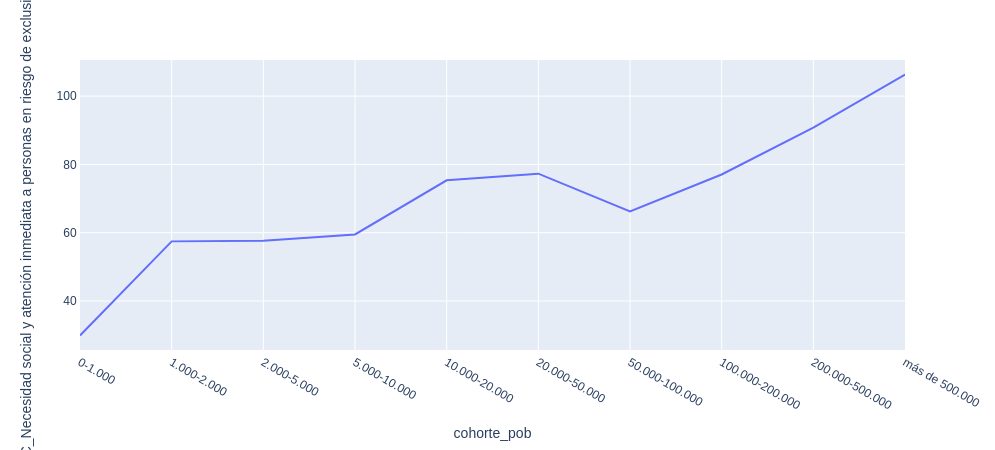

In [14]:
px.line(pivot, x="cohorte_pob", y=pc)

In [43]:
10750/28

383.92857142857144

In [31]:
pd.set_option('display.max_rows', 65)

df_indicadores_pob_pivot.loc[df_indicadores_pob_pivot['Nombre Ente Principal']=='Oropesa del Mar/Orpesa']

,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
246075,Oropesa del Mar/Orpesa,Abastecimiento de agua potable,Longitud de la red: metros lineales,156000.00
246076,Oropesa del Mar/Orpesa,Abastecimiento de agua potable,Nº viviendas conectadas y no conectadas,20876.00
246077,Oropesa del Mar/Orpesa,"Abastos, mercados, lonjas",Nº puestos,175.00
246078,Oropesa del Mar/Orpesa,"Abastos, mercados, lonjas",Superficie total en metros cuadrados,9600.00
246079,Oropesa del Mar/Orpesa,Acceso a los núcleos de población,Puntos kilométricos: P.K correspondientes al i...,990.70
246082,Oropesa del Mar/Orpesa,Alcantarillado,Longitud del tramo: metros lineales.,104125.00
246083,Oropesa del Mar/Orpesa,Alcantarillado,Nº viviendas con servicio,20876.00
246084,Oropesa del Mar/Orpesa,Alumbrado público,Nº puntos de luz,9950.00
246085,Oropesa del Mar/Orpesa,Alumbrado público,Potencia instalada,1150.00
246086,Oropesa del Mar/Orpesa,Alumbrado público,Superficie iluminada: metros lineales,1410.00


In [26]:
1+3+1+3+2+3+3+7+33+3+2+1+1+6

69

In [32]:
8830/43

205.34883720930233